# **Hate Speech Detection on Reddit**

#### To develop a hate speech detection system capable of accurately identifying and classifying hate speech in real-time, ensuring a safer and more welcoming environment for Reddit users.

### **Solution Description**
##### To tackle hate speech on Reddit, a comprehensive detection system was developed using machine learning (ML) and deep learning (DL) techniques:

##### **Data Preparation:** Collected and preprocessed Reddit comments, addressed class imbalances using SMOTE.
##### **Model Development:** Implemented and optimized ML models (SVM, SGD Classifier,Random Forest etc.) and DL models (CNN, LSTM).
##### **Performance:** LSTM model achieved the best accuracy of 0.84.
##### **Prediction:** Using LSTM Model for real-time detection.

### **Dataset Description:**
#### Total Samples: 22,841
#### **After Splitting:**
#### Training Data, Shape: (17,760 samples, 300 features)
##### Class Distribution: {0: 13506 ,1: 4254}
#### Testing Data, Shape: (4,440 samples, 300 features)
##### Class Distribution: {0: 3408 ,1: 1032}

### Label wise split in train data

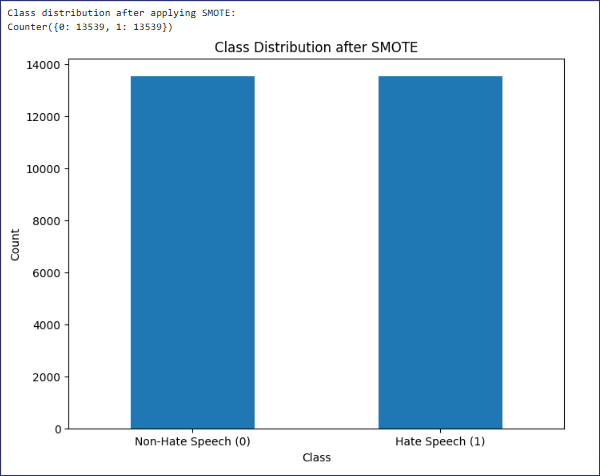

# Best Performing Model: **LSTM**

## **Classification Report**

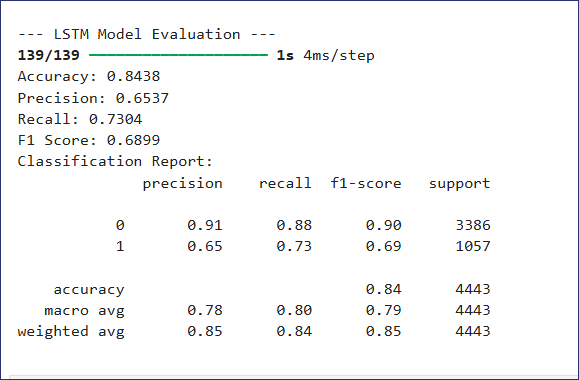

## **Confusion Matrix**

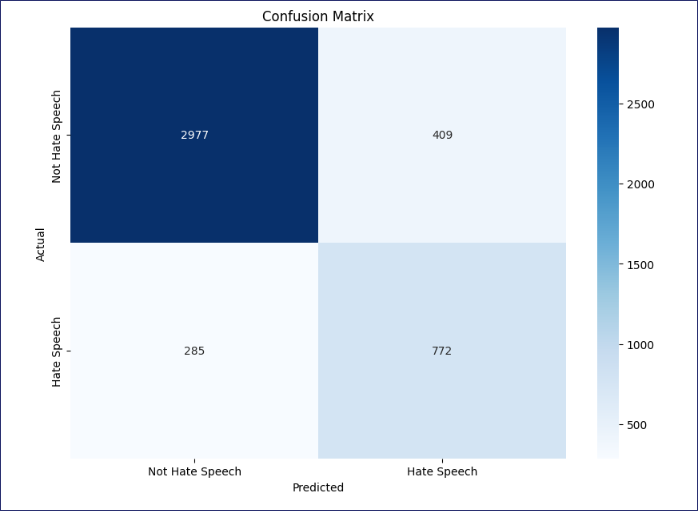

# Sample of Model Prediction

In [ ]:
import fasttext
# Load the FastText model
ft_model = fasttext.load_model('cc.en.300.bin')

In [ ]:
import numpy as np
import re
from bs4 import BeautifulSoup
import contractions
import string
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
import fasttext  # Ensure fasttext library is installed

# Load necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    try:
        if detect(text) != 'en':
            return ""
    except:
        return ""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    expanded_words = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_words)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = ' '.join(tokens)
    return clean_text

def preprocess_texts(texts, ft_model):
    preprocessed_texts = []
    valid_texts = []
    for text in texts:
        clean_text = preprocess_text(text)
        if clean_text == "":
            continue
        words = clean_text.split()
        word_vectors = [ft_model.get_word_vector(word) for word in words]
        if word_vectors:
            text_vector = np.mean(word_vectors, axis=0)
            preprocessed_texts.append(text_vector)
            valid_texts.append(text)
    return np.array(preprocessed_texts), valid_texts

def predict_lstm(texts, ft_model, lstm_model):
    preprocessed_vectors, valid_texts = preprocess_texts(texts, ft_model)
    if preprocessed_vectors.size == 0:
        print("No valid texts to process.")
        return

    preprocessed_vectors = np.expand_dims(preprocessed_vectors, axis=1)
    predictions = lstm_model.predict(preprocessed_vectors)

    for i, text in enumerate(valid_texts):
        print(f"Text: {text}")
        if predictions[i] > 0.5:
            print("Prediction: Hate Speech")
        else:
            print("Prediction: Not Hate Speech")
        print()

# Load LSTM model
lstm_model = load_model('lstm_model.h5')


[nltk_data] Downloading package punkt to C:\Users\Aman Shekhar
[nltk_data]     Sachan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aman Shekhar
[nltk_data]     Sachan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aman Shekhar
[nltk_data]     Sachan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# input from the user
texts = []
print("Enter texts (type 'done' when finished):")
while True:
    user_input = input()
    if user_input.lower() == 'done':
        break
    texts.append(user_input)

# Call the prediction function
predict_lstm(texts, ft_model, lstm_model)


Enter texts (type 'done' when finished):


 You ever fuck a bitch and she start to cry?
 done


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Text: You ever fuck a bitch and she start to cry?
Prediction: Hate Speech

